In [1]:
import numpy as np

In [2]:
lc = np.load("../learning_curve_slatm.npz")

In [3]:
lc_small = np.load("../learning_curve_small_slatm.npz")

In [12]:
frag_lc = np.load("../learning_curve_frags_slatm.npz")

In [7]:
list(lc)

['train_sizes', 'maes', 'std']

In [4]:
tr_size_small = lc_small['train_sizes']

In [5]:
tr_sizes = lc['train_sizes']

In [7]:
qm7_tr_sizes = np.concatenate((tr_size_small, tr_sizes))

In [9]:
qm7_mae = np.concatenate((lc_small['maes'], lc['maes'])) * 627.503

In [10]:
qm7_std = np.concatenate((lc_small['std'], lc['std'])) * 627.503

In [13]:
frag_tr_sizes = frag_lc['train_sizes']
frag_mae = frag_lc['maes']* 627.503
frag_std= frag_lc['std']* 627.503

In [14]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

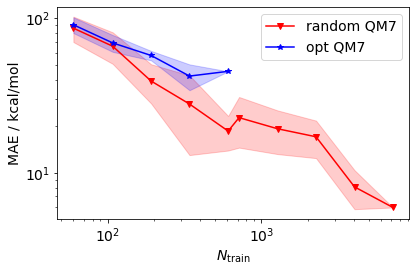

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(qm7_tr_sizes, qm7_mae, marker='v', color='red', label='random QM7')
ax.fill_between(qm7_tr_sizes, qm7_mae-qm7_std, qm7_mae+qm7_std, color='red', alpha=0.2)
ax.plot(frag_tr_sizes, frag_mae, marker='*', color='blue', label='opt QM7')
ax.fill_between(frag_tr_sizes, frag_mae-frag_std, frag_mae+frag_std, color='blue', alpha=0.2)
ax.set_xlabel("$N_{\mathrm{train}}$")
ax.set_ylabel("MAE / kcal/mol")
#ax.set_yticks([5, 12.5, 30])
#ax.set_yticklabels(['5', '12.5', '30'])
#ax.set_xticks([700, 2200, 7200])
#ax.set_xticklabels(['700', '2200', '7200'])
#plt.minorticks_off()
plt.legend()
plt.tight_layout()
plt.savefig('../learn_pen_energy.png', dpi=300)
plt.show()

In [26]:
tr_sizes

array([ 716, 1274, 2265, 4029, 7165])